<a href="https://colab.research.google.com/github/SherZhou/HW_2/blob/main/Perceptron_vs_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Q1 Reading Text Files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/prml')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%pwd

'/content/drive/MyDrive/prml'

In [ ]:
import glob
glob.glob('./data/*.txt')
f=open('./data/01.txt','r')
text1=f.read()
f.close()

In [ ]:
f=open('./data/01.txt','r')
text1=f.read()
f.close()

In [ ]:
text1

'Had for 1 year, 14,000 miles. Excellent fuel economy 27-30 on all highway. No mechanical problems. My wife would like an adjustable passenger seat, seating position too low. Fit and finish second to none. RL has plenty of power I use it often on steep hills. I like the styling much more than the 09 grille has a richer more elegant look than the 09. Handling is great in high speed situations, far superior to the TL. I like the exterior design, quite understated, however I do see the point of someone saying it looks too much like a Honda. I understand the 2011 will be a totally new car. Acura/Honda really does want to compete with the best from Lexus. After all is said and done would I buy it again... for sure.'



```
# 此内容为代码格式
```

## Q2:Feature Extraction using “Bag-of-word”

In [ ]:
f=open('./data/feature.txt','r')
feature=f.read()
f.close()
features=feature.split()
feature1=features[0]

In [ ]:
feature1


'car'

In [ ]:
# feature1=features.split()

In [ ]:
# feature1

In [ ]:
occurrence=text1.count(feature1)

## Question 3. Classifier Construction

In [ ]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

from numpy import linalg as LA
from sklearn import svm

In [ ]:
fcf = glob.glob('./data/*.txt')
fcf.sort()

In [ ]:
fcf

['./data/01.txt',
 './data/02.txt',
 './data/03.txt',
 './data/04.txt',
 './data/05.txt',
 './data/06.txt',
 './data/07.txt',
 './data/08.txt',
 './data/09.txt',
 './data/10.txt',
 './data/11.txt',
 './data/12.txt',
 './data/13.txt',
 './data/14.txt',
 './data/15.txt',
 './data/16.txt',
 './data/17.txt',
 './data/18.txt',
 './data/19.txt',
 './data/20.txt',
 './data/21.txt',
 './data/22.txt',
 './data/23.txt',
 './data/24.txt',
 './data/25.txt',
 './data/26.txt',
 './data/27.txt',
 './data/28.txt',
 './data/29.txt',
 './data/30.txt',
 './data/31.txt',
 './data/32.txt',
 './data/33.txt',
 './data/34.txt',
 './data/35.txt',
 './data/36.txt',
 './data/37.txt',
 './data/38.txt',
 './data/39.txt',
 './data/40.txt',
 './data/41.txt',
 './data/42.txt',
 './data/43.txt',
 './data/44.txt',
 './data/45.txt',
 './data/46.txt',
 './data/47.txt',
 './data/48.txt',
 './data/49.txt',
 './data/50.txt',
 './data/feature.txt']

In [ ]:
fcf = glob.glob('./data/*.txt') # list .txt files only
fcf.sort()
# file = open(fcf[0], 'r')
# text1 = file.read() # string
# file.close()

file = open(fcf[50], 'r')
features = file.read().split()
for feature_index in range(len(features)):
    features[feature_index]=features[feature_index]+' '

# Training data
Xtrain = np.zeros((1,np.shape(features)[0])) # empty list
for text_index in range(40):
    file_temp = open(fcf[text_index], 'r')
    text_temp = file_temp.read()
    occurence_temp = []
    for feature_index in features:
        occurence_temp.append(text_temp.count(feature_index)) 
    # print("length",Xtrain.shape)   
    Xtrain = np.concatenate((Xtrain, [occurence_temp]), axis = 0) # shape: 41-by-13

print("final length",Xtrain.shape)

Xtrain = np.delete(Xtrain, (0), axis = 0) # remove the first empty row 


#XTX = np.dot(Xtrain.T, Xtrain)

  # Subtracting from the mean and scaling 
meanX = np.mean(Xtrain,axis=0)
CtrX = Xtrain-meanX
S1 = np.dot(np.transpose(CtrX),CtrX)
#相关系数？
XTX = 1.0/(Xtrain.shape[0]-1)*S1



final length (41, 13)


In [ ]:
CtrX.shape

(40, 13)

In [ ]:
Xtrain

array([[0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 2., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [4., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [3., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [2., 0., 0., 0., 

In [ ]:
XTX

array([[ 1.07435897e+00, -3.66666667e-01, -2.82051282e-02,
         2.05128205e-02,  3.84615385e-03,  1.32051282e-01,
         2.30769231e-02,  3.20512821e-02, -3.94871795e-01,
         2.30769231e-02, -1.12820513e-01, -1.41025641e-02,
        -1.55128205e-01],
       [-3.66666667e-01,  7.46153846e-01, -3.33333333e-02,
        -6.66666667e-02, -9.10256410e-02, -1.16666667e-01,
        -3.33333333e-02, -5.76923077e-02,  5.58974359e-01,
         1.79487179e-02,  9.74358974e-02,  8.97435897e-03,
         1.24358974e-01],
       [-2.82051282e-02, -3.33333333e-02,  4.87179487e-02,
         4.61538462e-02, -8.97435897e-03,  4.23076923e-02,
        -2.56410256e-03,  1.92307692e-02, -3.58974359e-02,
        -2.56410256e-03, -1.02564103e-02, -1.28205128e-03,
        -1.41025641e-02],
       [ 2.05128205e-02, -6.66666667e-02,  4.61538462e-02,
         1.43589744e-01, -1.79487179e-02,  5.89743590e-02,
         2.05128205e-02,  6.41025641e-02, -7.17948718e-02,
        -5.12820513e-03, -2.05128205e

In [ ]:
w,v=LA.eig(XTX) 
v[:,0:2]

array([[-0.47018069, -0.8387557 ],
       [ 0.44887115, -0.01135339],
       [-0.01838545,  0.05570077],
       [-0.05398201,  0.03320991],
       [-0.05018266,  0.06008363],
       [-0.11089185, -0.05331425],
       [-0.02650152,  0.00204097],
       [-0.04643249,  0.01206909],
       [ 0.71252049, -0.53255913],
       [-0.01492482,  0.00177663],
       [ 0.13552435, -0.03537115],
       [ 0.01891096, -0.00744816],
       [ 0.17287697, -0.02496491]])

In [ ]:
w

array([2.15093327, 0.8177886 , 0.4215088 , 0.26128558, 0.17837637,
       0.14128865, 0.01744352, 0.02162422, 0.03288114, 0.05632679,
       0.04301087, 0.10464653, 0.111219  ])

In [ ]:
"""Section 1: Fill in your answers here"""

# compute eigenvalues and eigenvectors
w,v=LA.eig(XTX)

# Due to the descending order of eigenvalues in w, here we choose the first two columns of v.
# principal comonents; shape: 13-by-2
# PC scores; shape: 40-by-2
PC=v[:,0:2]
t=np.dot(CtrX,PC) 
t0=t[0:20][:]
t1=t[20:40][:]
X1 =t0  ## Assign the PC scores for class 1 here
X2 =t1 ## Assign the PC scores for class 2 here
""" End of answer Section 1"""


' End of answer Section 1'

In [ ]:
t

array([[-0.69394644,  0.84900884],
       [-0.84834294,  0.92749775],
       [-2.60271622, -2.54964562],
       [-0.56466914,  0.84662232],
       [-1.50503051, -0.83088907],
       [-0.61110163,  0.85869142],
       [-0.6148518 ,  0.90670596],
       [-1.14574167, -0.04544762],
       [-1.97521119, -1.66964477],
       [-0.56466914,  0.84662232],
       [-2.14008505, -1.68974911],
       [-0.72574365,  0.85339171],
       [-1.50503051, -0.83088907],
       [-1.03484982,  0.00786663],
       [-1.14574167, -0.04544762],
       [-0.6148518 ,  0.90670596],
       [-1.53153203, -0.8288481 ],
       [-1.13521515,  0.12803389],
       [-1.57013799, -0.76902881],
       [-0.69158516,  0.89394229],
       [ 1.58637262, -0.23754992],
       [-0.39179216,  0.82165742],
       [ 0.85869134,  0.25444284],
       [ 0.78194433,  0.81256217],
       [ 0.33307317,  0.82391555],
       [ 1.44476735, -0.26522048],
       [ 2.02176349, -0.76240846],
       [ 0.32072833,  0.28909828],
       [ 0.73224686,

In [ ]:
PC

array([[-0.47018069, -0.8387557 ],
       [ 0.44887115, -0.01135339],
       [-0.01838545,  0.05570077],
       [-0.05398201,  0.03320991],
       [-0.05018266,  0.06008363],
       [-0.11089185, -0.05331425],
       [-0.02650152,  0.00204097],
       [-0.04643249,  0.01206909],
       [ 0.71252049, -0.53255913],
       [-0.01492482,  0.00177663],
       [ 0.13552435, -0.03537115],
       [ 0.01891096, -0.00744816],
       [ 0.17287697, -0.02496491]])

In [ ]:
t1

array([[ 1.58637262, -0.23754992],
       [-0.39179216,  0.82165742],
       [ 0.85869134,  0.25444284],
       [ 0.78194433,  0.81256217],
       [ 0.33307317,  0.82391555],
       [ 1.44476735, -0.26522048],
       [ 2.02176349, -0.76240846],
       [ 0.32072833,  0.28909828],
       [ 0.73224686,  0.26733865],
       [ 2.06651547, -0.30153878],
       [-0.11579798,  0.83526894],
       [ 3.18315513, -1.30632098],
       [ 1.16877317, -0.27883201],
       [ 1.93099112, -0.26616762],
       [ 3.49155645, -1.36665704],
       [ 0.31814835,  0.82569218],
       [ 2.64351161, -0.79872675],
       [ 0.01972637,  0.79989778],
       [ 0.76959948,  0.2777449 ],
       [ 0.05707899,  0.81030403]])

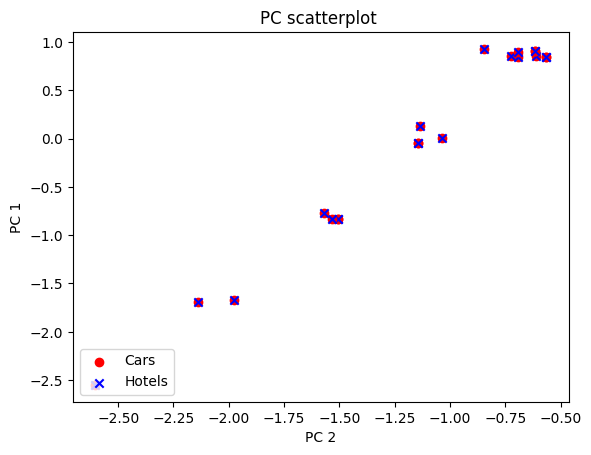

In [ ]:
fig, ax1  = plt.subplots(1,1, sharey = True)
for i in range(0,20): 
    """ Section 3: Fill in your answers, replace t with the PC scores for class 0 and class 1 respectively"""
    
    class_0 = ax1.scatter(t[i][0], t[i][1], c = 'r', marker = "o") # the 20 elements for class 0
    class_1 = ax1.scatter(t[i][0], t[i][1], c = 'b', marker = "x") # the  20 elements for class 1
    
ax1.set_title('PC scatterplot ') 
ax1.set_xlabel('PC 2')
ax1.set_ylabel('PC 1')
# class 0: cars  class 1: hotels
ax1.legend((class_0, class_1), ('Cars', 'Hotels'), scatterpoints=1, loc='lower left', ncol=1, fontsize=10)

# fig.savefig('03a_PC scatterplot.png', dpi = 200)   # save the figure to file
# plt.close(fig) 

### Q3a: Data visualization Using Principle Component Analysis

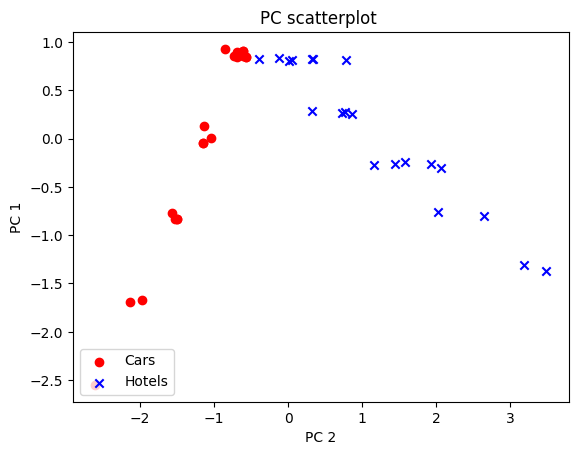

In [ ]:
fig, ax1  = plt.subplots(1,1, sharey = True)
for i in range(0,20): 
    """ Section 3: Fill in your answers, replace t with the PC scores for class 0 and class 1 respectively"""
    
    class_0 = ax1.scatter(t0[i][0], t0[i][1], c = 'r', marker = "o") # the 20 elements for class 0
    class_1 = ax1.scatter(t1[i][0], t1[i][1], c = 'b', marker = "x") # the  20 elements for class 1
    
ax1.set_title('PC scatterplot ') 
ax1.set_xlabel('PC 2')
ax1.set_ylabel('PC 1')
# class 0: cars  class 1: hotels
ax1.legend((class_0, class_1), ('Cars', 'Hotels'), scatterpoints=1, loc='lower left', ncol=1, fontsize=10)

# fig.savefig('03a_PC scatterplot.png', dpi = 200)   # save the figure to file
# plt.close(fig) 

### Q3b Classifier Construction

In [ ]:
Y

array([[ 1.        , -0.69394644,  0.84900884],
       [ 1.        , -0.84834294,  0.92749775],
       [ 1.        , -2.60271622, -2.54964562],
       [ 1.        , -0.56466914,  0.84662232],
       [ 1.        , -1.50503051, -0.83088907],
       [ 1.        , -0.61110163,  0.85869142],
       [ 1.        , -0.6148518 ,  0.90670596],
       [ 1.        , -1.14574167, -0.04544762],
       [ 1.        , -1.97521119, -1.66964477],
       [ 1.        , -0.56466914,  0.84662232],
       [ 1.        , -2.14008505, -1.68974911],
       [ 1.        , -0.72574365,  0.85339171],
       [ 1.        , -1.50503051, -0.83088907],
       [ 1.        , -1.03484982,  0.00786663],
       [ 1.        , -1.14574167, -0.04544762],
       [ 1.        , -0.6148518 ,  0.90670596],
       [ 1.        , -1.53153203, -0.8288481 ],
       [ 1.        , -1.13521515,  0.12803389],
       [ 1.        , -1.57013799, -0.76902881],
       [ 1.        , -0.69158516,  0.89394229],
       [-1.        , -1.58637262,  0.237

In [ ]:
np.dot(Y,np.zeros((3,1)))<=0

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

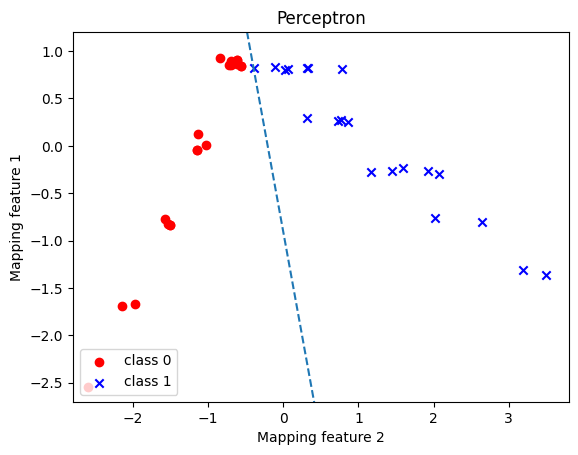

In [ ]:
"""
# ==============  Perceptron =============================
"""
"""Section 2: Fill in your answers here"""
        
X1 = t0 ## Assign the PC scores for class 1 here
X2 = t1## Assign the PC scores for class 2 here

"""End of section 2"""

Y1 = np.concatenate((np.ones((20,1)),X1), axis=1)
Y2 = np.concatenate((np.ones((20,1))*-1,-X2), axis=1)
Y = np.concatenate((Y1,Y2), axis=0)  # shape: 40-by-3

# Initialize
a = np.zeros((3,1))

# no. of misclassified samples
sum_wrong = 1

a_iter = a
k = 0

# error=0 or iteration=1000 end 
while sum_wrong > 0 and k < 1000:
  # add wrong classification result: np.dot(Y,a_iter) <= 0
    wrong = np.dot(Y,a_iter) <= 0
    sum_wrong = sum(wrong)
    sum1 = sum(wrong*np.ones((1,3))*Y)
    # apdate
    a_iter = a_iter+sum1.reshape(3,1)
    k=k+1
    
a_con = a_iter

fig, ax1  = plt.subplots(1,1, sharey = True)

x = np.arange(-8,8,1)
y = -(a_con[0]+a_con[1]*x)/a_con[2]

line1 = ax1.plot(x, y, '--', label = "perceptron")

for i in range(0,20): 
    """ Section 3: Fill in your answers, replace t with the PC scores for class 0 and class 1 respectively"""
    
    class_0 = ax1.scatter(X1[i][0], X1[i][1],    c = 'r', marker = "o") # the 20 elements for class 0
    class_1 = ax1.scatter(X2[i][0], X2[i][1], c = 'b', marker = "x") # the  20 elements for class 1
    
    """ End of Section 3"""

ax1.set_title('Perceptron') 
ax1.set_xlabel('Mapping feature 2')
ax1.set_ylabel('Mapping feature 1')
ax1.legend((class_0, class_1), ('class 0', 'class 1'), scatterpoints=1, loc='lower left', ncol=1, fontsize=10)
ax1.set_xlim([-2.8,3.8])
ax1.set_ylim([-2.7,1.2])

fig.show()
# fig.savefig('Q4_Perceptron.png', dpi = 200)   # save the figure to file
# plt.close(fig) 

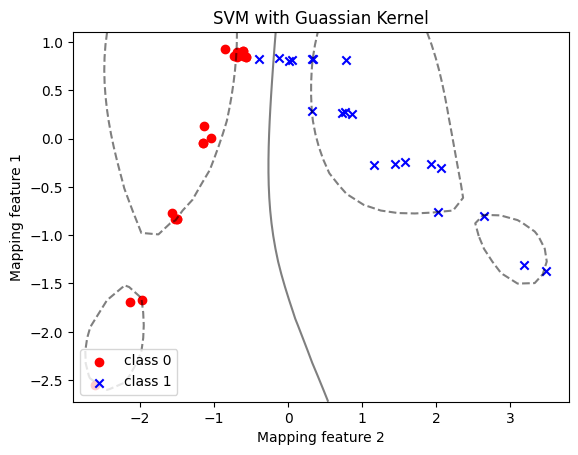

In [ ]:
# ============== Hard-margin SVM =========================


X = np.concatenate((X1,X2), axis=0)
Y_svm=np.concatenate((np.zeros((1,20)),np.ones((1,20))), axis=1)
Y_svm=Y_svm.ravel()
"""Section 4: Fill in your answers here"""
#Fit Linear SVM
#nonlinear kernel
#默认为 径像核函数/高斯核
clf=svm.SVC()
clf.fit(X,Y_svm)

# clf=svm.SVC(kernel='linear',C=1000)
# clf.fit(X,Y_svm)


"""End of Section 4"""
           
fig, ax1  = plt.subplots(1,1, sharey = True)


for i in range(0,20): 
    class_0 = ax1.scatter(t[i][0],    t[i][1],    c = 'r', marker = "o") # the first  20 elements for class 0
    class_1 = ax1.scatter(t[i+20][0], t[i+20][1], c = 'b', marker = "x") # the latter 20 elements for class 1

# plot the decision function
xlim = ax1.get_xlim()
ylim = ax1.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax1.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])


ax1.set_title('SVM with Guassian Kernel') 
ax1.set_xlabel('Mapping feature 2')
ax1.set_ylabel('Mapping feature 1')
ax1.legend((class_0, class_1), ('class 0', 'class 1'), scatterpoints=1, loc='lower left', ncol=1, fontsize=10)

# fig.savefig('Q4_Hard-margin SVM.png', dpi = 200)   # save the figure to file
fig.show()
# plt.close(fig) 

In [ ]:
clf

SVC()

In [ ]:
# 1. 惩罚系数C：值范围：0.0001 到10000，值越大，对错误列惩罚程度越大，越不能容忍出现误差，容易过拟合；越小，容易欠拟合。
# 2. gamma：默认是1/n_features 选择rbf函数作为kernel后，该函数自带的一个参数，隐含的决定了数据映射到新的特征空间后的分布，gamma越大，支持向量越小，反之。支持向量的个数影响训练核预测的速度

from sklearn.model_selection import GridSearchCV
svc = svm.SVC()
grid = GridSearchCV(svc, param_grid={"C":[0.1, 1, 10], "gamma": [1, 0.1, 0.01]}, cv=4)
# 'C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000], 'gamma': [0.001, 0.0001]}   

grid.fit(X,Y_svm)
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 1, 'gamma': 1} with a score of 0.97


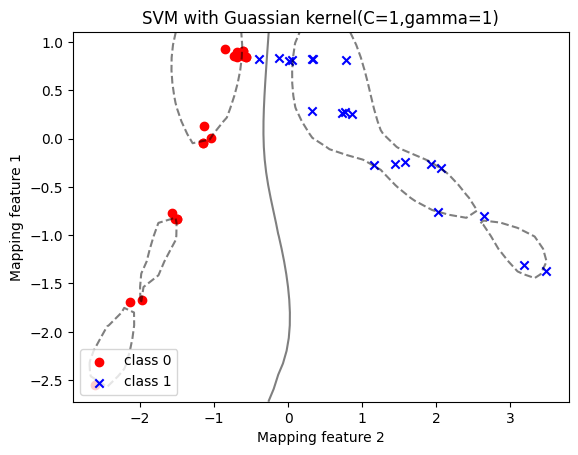

In [ ]:
# ============== Hard-margin SVM =========================


X = np.concatenate((X1,X2), axis=0)
Y_svm=np.concatenate((np.zeros((1,20)),np.ones((1,20))), axis=1)
Y_svm=Y_svm.ravel()
"""Section 4: Fill in your answers here"""
#Fit Linear SVM
#nonlinear kernel
#默认为 径像核函数/高斯核

#C=best_parameters['C'], gamma=best_parameters['gamma'], probability=True
# c越高，说明越不能容忍出现误差,容易过拟合。C越小，容易欠拟合。C过大或过小，泛化能力变差。C一般可以选择为：10^t , t=[- 4，4]就是0.0001 到10000。
#默认c=1,gamma=1 / n_features
clf=svm.SVC(C=1, gamma=1, probability=True)
clf.fit(X,Y_svm)

# clf=svm.SVC(kernel='linear',C=1000)
# clf.fit(X,Y_svm)


"""End of Section 4"""
           
fig, ax1  = plt.subplots(1,1, sharey = True)


for i in range(0,20): 
    class_0 = ax1.scatter(t[i][0],    t[i][1],    c = 'r', marker = "o") # the first  20 elements for class 0
    class_1 = ax1.scatter(t[i+20][0], t[i+20][1], c = 'b', marker = "x") # the latter 20 elements for class 1

# plot the decision function
xlim = ax1.get_xlim()
ylim = ax1.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax1.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])


ax1.set_title('SVM with Guassian kernel(C=1,gamma=1)') 
ax1.set_xlabel('Mapping feature 2')
ax1.set_ylabel('Mapping feature 1')
ax1.legend((class_0, class_1), ('class 0', 'class 1'), scatterpoints=1, loc='lower left', ncol=1, fontsize=10)
# fig.savefig('Q4_Hard-margin SVM.png', dpi = 200)   # save the figure to file
fig.show()
# plt.close(fig) 

In [ ]:
clf

SVC(C=1, gamma=1, probability=True)

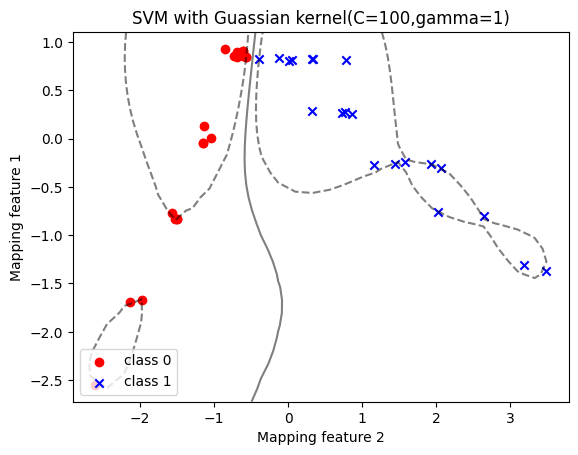

In [ ]:

X = np.concatenate((X1,X2), axis=0)
Y_svm=np.concatenate((np.zeros((1,20)),np.ones((1,20))), axis=1)
Y_svm=Y_svm.ravel()
"""Section 4: Fill in your answers here"""
#Fit Linear SVM
#nonlinear kernel
#默认为 径像核函数/高斯核

#C=best_parameters['C'], gamma=best_parameters['gamma'], probability=True
# c越高，说明越不能容忍出现误差,容易过拟合。C越小，容易欠拟合。C过大或过小，泛化能力变差。C一般可以选择为：10^t , t=[- 4，4]就是0.0001 到10000。
#默认c=1,gamma=1 / n_features
clf=svm.SVC(C=100, gamma=1, probability=True)
clf.fit(X,Y_svm)

# clf=svm.SVC(kernel='linear',C=1000)
# clf.fit(X,Y_svm)


"""End of Section 4"""
           
fig, ax1  = plt.subplots(1,1, sharey = True)


for i in range(0,20): 
    class_0 = ax1.scatter(t[i][0],    t[i][1],    c = 'r', marker = "o") # the first  20 elements for class 0
    class_1 = ax1.scatter(t[i+20][0], t[i+20][1], c = 'b', marker = "x") # the latter 20 elements for class 1

# plot the decision function
xlim = ax1.get_xlim()
ylim = ax1.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax1.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])


ax1.set_title('SVM with Guassian kernel(C=100,gamma=1)') 
ax1.set_xlabel('Mapping feature 2')
ax1.set_ylabel('Mapping feature 1')
ax1.legend((class_0, class_1), ('class 0', 'class 1'), scatterpoints=1, loc='lower left', ncol=1, fontsize=10)
# fig.savefig('Q4_Hard-margin SVM.png', dpi = 200)   # save the figure to file
fig.show()
# plt.close(fig) 

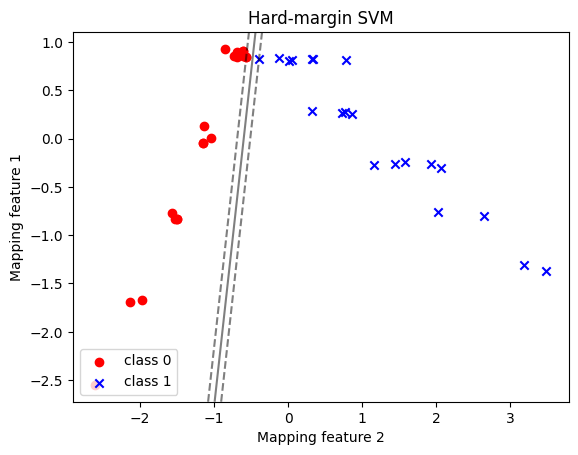

In [ ]:

clf=svm.SVC(kernel='linear',C=1000)
clf.fit(X,Y_svm)

fig, ax1  = plt.subplots(1,1, sharey = True)


for i in range(0,20): 
    class_0 = ax1.scatter(t[i][0],    t[i][1],    c = 'r', marker = "o") # the first  20 elements for class 0
    class_1 = ax1.scatter(t[i+20][0], t[i+20][1], c = 'b', marker = "x") # the latter 20 elements for class 1

# plot the decision function
xlim = ax1.get_xlim()
ylim = ax1.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
  #meshgrid从坐标向量返回坐标矩阵
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax1.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])


ax1.set_title('Hard-margin SVM') 
ax1.set_xlabel('Mapping feature 2')
ax1.set_ylabel('Mapping feature 1')
ax1.legend((class_0, class_1), ('class 0', 'class 1'), scatterpoints=1, loc='lower left', ncol=1, fontsize=10)

# fig.savefig('Q4_Hard-margin SVM.png', dpi = 200)   # save the figure to file
fig.show()
# plt.close(fig) 

In [ ]:
clf

SVC(C=1000, kernel='linear')

In [ ]:
print(yy)

[-2.72350279 -2.59161115 -2.4597195  -2.32782786 -2.19593621 -2.06404457
 -1.93215292 -1.80026128 -1.66836963 -1.53647799 -1.40458634 -1.2726947
 -1.14080305 -1.00891141 -0.87701976 -0.74512812 -0.61323647 -0.48134483
 -0.34945318 -0.21756154 -0.08566989  0.04622175  0.1781134   0.31000504
  0.44189669  0.57378834  0.70567998  0.83757163  0.96946327  1.10135492]


## Q4 Testing Stage

In [ ]:
fcf = glob.glob('./data/*.txt') # list .txt files only
fcf.sort()

In [ ]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D
from numpy import linalg as LA
from sklearn import svm

Y_true = [0,1,1,0,0,0,1,1,0,1]

fcf = glob.glob('./data/*.txt') # list .txt files only
fcf.sort()
file = open(fcf[0], 'r')
text1 = file.read() # string
file.close()

file = open(fcf[50], 'r')
features = file.read().split()

# Training data
Xtrain = np.zeros((1,np.shape(features)[0])) # empty list
for text_index in range(40):
    file_temp = open(fcf[text_index], 'r')
    text_temp = file_temp.read()
    occurence_temp = []
    for feature_index in features:
        occurence_temp.append(text_temp.count(feature_index)) 
    Xtrain = np.concatenate((Xtrain, [occurence_temp]), axis = 0) # shape: 41-by-13

Xtrain = np.delete(Xtrain, (0), axis = 0) # remove the first empty row 

# Testing data
Xtest = np.zeros((1,np.shape(features)[0])) # empty list
for text_index in range(40,50):
    file_temp = open(fcf[text_index], 'r')
    text_temp = file_temp.read()
    occurence_temp = []
    for feature_index in features:
        occurence_temp.append(text_temp.count(feature_index)) 
    Xtest = np.concatenate((Xtest, [occurence_temp]), axis = 0) # shape: 11-by-13
    
Xtest = np.delete(Xtest, (0), axis = 0) # remove the first empty row

#XTX = np.dot(Xtrain.T, Xtrain)


# Subtracting from the mean and scaling are not required. But it is acceptable if you did so.
meanX = np.mean(Xtrain,axis=0)
CtrX = Xtrain-meanX
CtrXtest = Xtest-meanX
S1 = np.dot(np.transpose(CtrX),CtrX)
XTX = 1.0/(Xtrain.shape[0]-1)*S1

w, v = LA.eig(XTX) # compute eigenvalues and eigenvectors

# Due to the descending order of eigenvalues in w, here we choose the first two columns of v.
PC = v[:,0:2] # principal comonents; shape: 13-by-2
t = np.dot(CtrX,PC) # PC scores for training data; shape: 40-by-2
tt = np.dot(CtrXtest,PC) # PC scores for testing data; shape: 10-by-2 

# ==============  Perceptron =============================

"""
        You may refer to pg. 26, Ch2 for the perceptron example.    
"""


X1 = t[0:20][:]
X2 = t[20:40][:]

Y1 = np.concatenate((np.ones((20,1)),X1), axis=1)
Y2 = np.concatenate((np.ones((20,1))*-1,-X2), axis=1)
Yt = np.concatenate((Y1,Y2), axis=0)  # shape: 40-by-3

# Initialize
a = np.zeros((3,1))

# no. of misclassified samples
sum_wrong = 1

a_iter = a
k = 0

while sum_wrong > 0 and k < 1000:
    wrong = np.dot(Yt,a_iter) <= 0
    sum_wrong = sum(wrong)
    sum1 = sum(wrong*np.ones((1,3))*Yt)
    a_iter = a_iter+sum1.reshape(3,1)
    k=k+1
    
a_con = a_iter

Y_perceptron = []
for i in range(10):
    w_temp = np.array([np.append(1, tt[i][:])]).T # (3,1)
    J = np.dot(a_con.T, w_temp)
    if J > 0:
        Y_perceptron.append(0)
    else:
        Y_perceptron.append(1)

error_perceptron_projected = sum(sum(abs(np.array([Y_true]) - np.array([Y_perceptron]))))/10
print("Error rate for projected test samples by perceptron", error_perceptron_projected)
        


# ============== Hard-margin SVM =========================
"""
        You may refer to pg. 20, Ch3 for the hard-margin SVM example.    
"""
X1 = t[0:20][:]
X2 = t[20:40][:]
X = np.concatenate((X1,X2), axis=0)
Y_svm=np.concatenate((np.zeros((1,20)),np.ones((1,20))), axis=1)
Y_svm=Y_svm.ravel()

#Fit Linear SVM
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, Y_svm)

"""
       Q4 Section 1: Put down your answers here
"""
Y_SVM_pred=clf.predict(tt)
#predictor lables
#Y_SVM_pred
"""
        End of Q4 Section 1    
"""
error_SVM_PCA = sum(sum(abs(np.array([Y_true]) - np.array([Y_SVM_pred]))))/10
#0.1
print("Error rate for projected test samples by SVM", error_SVM_PCA)

Error rate for projected test samples by perceptron 0.0
Error rate for projected test samples by SVM 0.1


In [ ]:
t

array([[ 1.57530749, -0.80835655],
       [ 1.72181359, -0.5840527 ],
       [ 3.13660147,  2.56536295],
       [ 1.06786769, -1.28221261],
       [ 1.81411332,  0.11489489],
       [ 0.99840327, -1.41791015],
       [ 1.96061943,  0.33919873],
       [ 1.46543335, -0.70381633],
       [ 3.67240147,  3.58501216],
       [ 1.35616325, -0.6509358 ],
       [ 2.29910782,  0.88844081],
       [ 1.16299255, -1.30988023],
       [ 2.3183794 ,  1.10617309],
       [ 1.61324661, -0.3212323 ],
       [ 1.8270125 ,  0.14782304],
       [ 1.68840539, -0.39677435],
       [ 2.23095056,  0.91102345],
       [ 2.57546276,  1.43587658],
       [ 2.89780426,  2.02190923],
       [ 1.5668695 , -0.76310106],
       [-2.15769405, -0.05021385],
       [-0.37991374, -1.34114122],
       [ 0.4545463 ,  0.40254628],
       [-0.92500022, -1.63460494],
       [-0.67202203, -1.40552599],
       [-4.36286082,  1.54604613],
       [-2.67900482,  0.37096523],
       [-0.32985111, -1.19234446],
       [-1.61818982,

In [ ]:
# ==============  Perceptron =============================
"""
        You may refer to  Ch2 for the perceptron example.    
"""
X1 = Xtrain[0:20][:]
X2 = Xtrain[20:40][:]

Y1 = np.concatenate((np.ones((20,1)),X1), axis=1)
Y2 = np.concatenate((np.ones((20,1))*-1,-X2), axis=1)
Yt = np.concatenate((Y1,Y2), axis=0)  # shape: 40-by-3

# Initialize
a = np.zeros((14,1))

# no. of misclassified samples
sum_wrong = 1

a_iter = a
k = 0

while sum_wrong > 0 and k < 1000:
    wrong = np.dot(Yt,a_iter) <= 0
    sum_wrong = sum(wrong)
    sum1 = sum(wrong*np.ones((1,14))*Yt)
    a_iter = a_iter+sum1.reshape(14,1)
    k=k+1
    
a_con = a_iter

Y_perceptron = []
for i in range(10):
    w_temp = np.array([np.append(1, Xtest[i][:])]).T # (3,1)
    J = np.dot(a_con.T, w_temp)
    if J > 0:
        Y_perceptron.append(0)
    else:
        Y_perceptron.append(1)

error_perceptron = sum(sum(abs(np.array([Y_true]) - np.array([Y_perceptron]))))/10
print("Error rate for  test samples by perceptron", error_perceptron)

Error rate for  test samples by perceptron 0.1


In [ ]:
X1

array([[1., 0., 1., 2., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 2., 1., 1., 0., 1., 0., 0., 0., 0., 0.],
       [5., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [2., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [2., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [6., 0., 0., 0., 2., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [3., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [3., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0.],
       [2., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 2., 0., 1., 1., 0., 1., 0., 0., 0.],
       [3., 0., 0., 0., 

In [ ]:
"""
        You may refer to pg. 20, Ch3 for the hard-margin SVM example.    
"""
X1 = Xtrain[0:20][:]
X2 = Xtrain[20:40][:]
X = np.concatenate((X1,X2), axis=0)

Y_svm_all=np.concatenate((np.zeros((1,20)),np.ones((1,20))), axis=1)
Y_svm_all=Y_svm_all.ravel()

#Fit Linear SVM
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, Y_svm_all)

"""
       Q4 Section 2: Put down your answers here
"""           
#0
Y_SVM_pred=clf.predict(Xtest)

"""
       End of Q4 Section 2
"""
error_SVM = sum(sum(abs(np.array([Y_true]) - np.array([Y_SVM_pred]))))/10
print("Error rate for test samples by SVM", error_SVM)


Error rate for test samples by SVM 0.0
